# Dimensionality Reduction

Dataset: MNIST

Tasks: reduce the dataset’s dimensionality (PCA, t-SNE, LLE, MDS, LDA), then apply classification
(Logistic, SVM, Random Forest)

Hints: sklearn.decomposition, PCA(), IncrementalPCA(), KernelPCA()

### Import data set

In [1]:
pip install pandas numpy matplotlib sklearn

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/Applications/Xcode.app/Contents/Developer/usr/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier

# Fetch the MNIST dataset
mnist = fetch_openml('mnist_784', version=1)

# Extract features and target
X, y = mnist['data'], mnist['target']

# Get the first 1000 rows because of performance reasons
X = X[:1000]
y = y[:1000]

print("Fetching data DONE")

Fetching data DONE


Shape of the data: (1000, 784)
Shape of the target: (1000,)


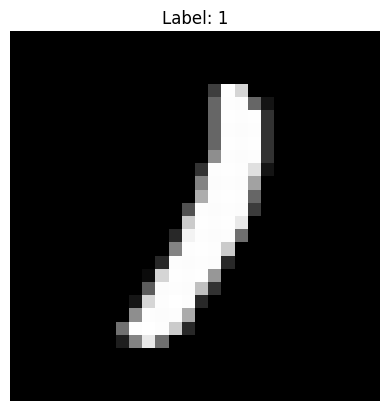

In [5]:
# Look at the shape of the data
print("Shape of the data:", X.shape)  # (70000, 784)
print("Shape of the target:", y.shape)  # (70000,)

# Extract 1 data point
sample_index = 78
sample_data = X.iloc[sample_index]
sample_label = y.iloc[sample_index]

# Reshape the data point into a 28x28 matrix
sample_image = sample_data.values.reshape(28, 28)

# Visualize the reshaped data point
plt.imshow(sample_image, cmap='gray')
plt.title(f'Label: {sample_label}')
plt.axis('off')
plt.show()

### Standardise the data

In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

import matplotlib.pyplot as plt

# Standardize the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

### Projection using LLE

In [8]:
from sklearn.manifold import LocallyLinearEmbedding

# Perform LLE
n_components = 2  # Number of dimensions to reduce to
lle = LocallyLinearEmbedding(n_components=n_components, n_neighbors=10)
X_lle = lle.fit_transform(scaled_features)

In [10]:
# Split data into test and train
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lle, y, test_size=0.2, random_state=42)

### Logistic Classification

In [11]:
# Create and train the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Make predictions
y_pred_log_reg = log_reg.predict(X_test)

# Evaluate the model
accuracy_log_reg = accuracy_score(y_test, y_pred_log_reg)
report_log_reg = classification_report(y_test, y_pred_log_reg)

print(f'Logistic Regression Accuracy: {accuracy_log_reg}')
print('Logistic Regression Classification Report:')
print(report_log_reg)

Logistic Regression Accuracy: 0.2
Logistic Regression Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.15      1.00      0.26        20
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00        23
           7       0.32      0.83      0.46        24
           8       0.00      0.00      0.00        13
           9       0.00      0.00      0.00        21

    accuracy                           0.20       200
   macro avg       0.05      0.18      0.07       200
weighted avg       0.05      0.20      0.08       200



/Users/hungnguy/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hungnguy/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hungnguy/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le

### Random Forest

In [12]:
from sklearn.ensemble import RandomForestClassifier

# Create and train the Random Forest model
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Make predictions
y_pred_rf = rf_clf.predict(X_test)

# Evaluate the model
accuracy_rf = accuracy_score(y_test, y_pred_rf)
report_rf = classification_report(y_test, y_pred_rf)

print(f'Random Forest Accuracy: {accuracy_rf}')
print('Random Forest Classification Report:')
print(report_rf)

Random Forest Accuracy: 0.455
Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.45      0.53      0.49        19
           1       0.84      0.80      0.82        20
           2       0.47      0.32      0.38        22
           3       0.21      0.15      0.18        26
           4       0.41      0.60      0.49        15
           5       0.30      0.41      0.35        17
           6       0.38      0.39      0.38        23
           7       0.60      0.50      0.55        24
           8       0.42      0.62      0.50        13
           9       0.53      0.43      0.47        21

    accuracy                           0.46       200
   macro avg       0.46      0.47      0.46       200
weighted avg       0.46      0.46      0.45       200



### SVM

In [13]:
from sklearn.svm import SVC

# Create and train the SVM model
svm_clf = SVC(kernel='linear', random_state=42)
svm_clf.fit(X_train, y_train)

# Make predictions
y_pred_svm = svm_clf.predict(X_test)

# Evaluate the model
accuracy_svm = accuracy_score(y_test, y_pred_svm)
report_svm = classification_report(y_test, y_pred_svm)

print(f'SVM Accuracy: {accuracy_svm}')
print('SVM Classification Report:')
print(report_svm)

SVM Accuracy: 0.11
SVM Classification Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        19
           1       0.10      1.00      0.18        20
           2       0.00      0.00      0.00        22
           3       0.00      0.00      0.00        26
           4       0.00      0.00      0.00        15
           5       0.00      0.00      0.00        17
           6       0.00      0.00      0.00        23
           7       1.00      0.08      0.15        24
           8       0.00      0.00      0.00        13
           9       0.00      0.00      0.00        21

    accuracy                           0.11       200
   macro avg       0.11      0.11      0.03       200
weighted avg       0.13      0.11      0.04       200



/Users/hungnguy/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hungnguy/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/Users/hungnguy/Library/Python/3.9/lib/python/site-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", le